<a href="https://colab.research.google.com/github/audreymoreira/case_ENEM_2017/blob/main/Vistas_do_ENEM_2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ENEM 2017 - ANÁLISE DOS MICRODADOS E ALGUMAS RELAÇÕES INTERESSANTES
## TRABALHO EM ANDAMENTO
### Audrey Moreira

Imports

In [93]:
import dask
import dask.dataframe as dd
import zipfile
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt

### Começo do tratamento: A aquisição do arquivo de dados no processo que nos permite analisar seu conteúdo. O arquivo tem um pouco mais de 3GB.
### Fiz upload do arquivo .zip, escolhi as colunas que permitem uma análise inicial para reduzir a carga na memória.  

In [2]:
with zipfile.ZipFile('/content/drive/MyDrive/COLAB_DADOS/MICRODADOS_ENEM_2017.zip') as z:
    print(*z.namelist(),sep="\n")

MICRODADOS_ENEM_2017.csv


In [3]:
colunas =['TP_ESCOLA', 'NO_MUNICIPIO_PROVA', 'SG_UF_PROVA',
          'TP_PRESENCA_CH', 'TP_PRESENCA_CN', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT',
          'NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO',
          'Q001', 'Q002', 'Q006', 'Q025']

dtype={'TP_ESCOLA': 'category',
       'NO_MUNICIPIO_PROVA': 'category',
       'SG_UF_PROVA': 'category',
       'TP_PRESENCA_CH': 'category',
       'TP_PRESENCA_CN': 'category',
       'TP_PRESENCA_LC': 'category',
       'TP_PRESENCA_MT': 'category',
       'NU_NOTA_CH': 'float16',
       'NU_NOTA_CN': 'float16',
       'NU_NOTA_LC': 'float16',
       'NU_NOTA_MT': 'float16',
       'NU_NOTA_REDACAO': 'float16',
       'Q001': 'category',
       'Q002': 'category',
       'Q006': 'category',
       'Q025': 'category'}

In [4]:
with zipfile.ZipFile('/content/drive/MyDrive/COLAB_DADOS/MICRODADOS_ENEM_2017.zip') as z:
    with z.open('MICRODADOS_ENEM_2017.csv') as f:
        enem_2017 = pd.read_csv(f,sep=';',encoding='ISO-8859-1',usecols=colunas,dtype=dtype)


### Este é o principal dataset: Este dataframe tem esta dimensão:

In [5]:
enem_2017.shape

(6731278, 16)

### Escolhi 4 questões do Questionário Sócio-Econômico: duas sobre a educação/formação dos pais, a renda mensal da família e ter internet em casa. 
### Calculando a porcentagem de estudantes que respondeu as questões escolhidas do Questionário Sócio-Econômico:

In [6]:
enem_2017.isnull().sum()

TP_ESCOLA                   0
NO_MUNICIPIO_PROVA          0
SG_UF_PROVA                 0
TP_PRESENCA_CN            227
TP_PRESENCA_CH            227
TP_PRESENCA_LC            227
TP_PRESENCA_MT            227
NU_NOTA_CN            2293781
NU_NOTA_CH            2029913
NU_NOTA_LC            2029913
NU_NOTA_MT            2293781
NU_NOTA_REDACAO       2029913
Q001                        0
Q002                        0
Q006                        1
Q025                        1
dtype: int64

### As quatro questões escolhidas Q001, Q002, Q006 e Q25 foram respondidas por quase todos os estudantes, exceto 1. Portanto as respostas, se honestas, serão significativas.

# Cálculo da NOTA FINAL: é a média aritmética das notas em Ciências Naturais, Ciências Humanas, Linguagem e Códigos, Matemática e Redação.

In [7]:
enem_2017['NOTA_FINAL'] = (enem_2017['NU_NOTA_CN'] + enem_2017['NU_NOTA_CH'] + enem_2017['NU_NOTA_LC'] + enem_2017['NU_NOTA_MT'] + enem_2017['NU_NOTA_REDACAO']) / 5

In [8]:
enem_2017

,TP_ESCOLA,NO_MUNICIPIO_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q006,Q025,NOTA_FINAL
0,1,Araraquara,SP,1,1,1,1,445.50,589.00,621.5,465.50,560.0,E,D,D,B,536.50
1,1,Cassilândia,MS,0,0,0,0,NaN,NaN,NaN,NaN,NaN,C,E,C,A,NaN
2,1,São Paulo,SP,0,0,0,0,NaN,NaN,NaN,NaN,NaN,A,A,G,B,NaN
3,1,Lages,SC,1,1,1,1,604.00,610.50,564.0,591.00,580.0,E,D,D,B,589.50
4,1,Maceió,AL,1,1,1,1,482.00,569.00,571.0,584.50,580.0,A,B,C,B,557.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6731273,3,São Paulo,SP,1,1,1,1,520.00,571.00,558.5,578.00,680.0,G,E,O,B,581.50
6731274,1,Jaraguá,GO,0,0,0,0,NaN,NaN,NaN,NaN,NaN,A,A,B,A,NaN
6731275,2,Rio de Janeiro,RJ,1,1,1,1,461.25,424.25,431.5,407.50,540.0,A,A,B,B,452.75
6731276,1,Contagem,MG,1,1,1,1,541.00,587.00,528.5,479.25,0.0,B,B,D,A,427.25


# A distribuição de NOTAS FINAIS com todos os dados:

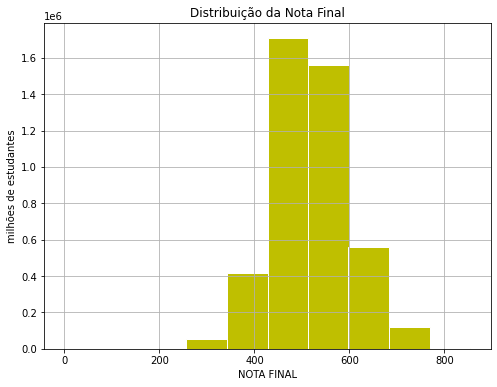

In [9]:
plt.figure(figsize = (8, 6))
plt.xlabel('NOTA FINAL')
plt.ylabel('milhões de estudantes')
plt.title('Distribuição da Nota Final')
enem_2017['NOTA_FINAL'].hist(color='y', edgecolor="white", bins=10)

# A mediana de NOTA FINAL é:

In [10]:
enem_2017['NOTA_FINAL'].median()


514.0

# A ausência dos alunos é significativa: mais de dois milhões de alunos não fizeram as provas em 2017.

In [11]:
enem_2017.isnull().sum()

TP_ESCOLA                   0
NO_MUNICIPIO_PROVA          0
SG_UF_PROVA                 0
TP_PRESENCA_CN            227
TP_PRESENCA_CH            227
TP_PRESENCA_LC            227
TP_PRESENCA_MT            227
NU_NOTA_CN            2293781
NU_NOTA_CH            2029913
NU_NOTA_LC            2029913
NU_NOTA_MT            2293781
NU_NOTA_REDACAO       2029913
Q001                        0
Q002                        0
Q006                        1
Q025                        1
NOTA_FINAL            2304586
dtype: int64

# A maior NOTA FINAL no ENEM 2017 foi:

In [12]:
nota_maxima = enem_2017['NOTA_FINAL'].max()
nota_maxima

855.0

# E foi obtida por um estudante com estes dados:

In [13]:
enem_2017.loc[enem_2017['NOTA_FINAL'] == nota_maxima]

,TP_ESCOLA,NO_MUNICIPIO_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q006,Q025,NOTA_FINAL
668502,3,São José dos Pinhais,PR,1,1,1,1,853.0,831.5,724.0,927.5,940.0,G,G,Q,B,855.0


# Resultado por Tipo de Escola - Questionário Sócio-Econômico.
## Tipo de escola:
### Não respondeu 1
### Pública       2
### Privada       3
### Exterior      4

#### Evidencia a melhor performance do Exterior e das Escolas Privadas, tanto na Nota Final quanto na Redação.

In [14]:
tipo_escola = enem_2017.groupby('TP_ESCOLA').mean()
tipo_escola = tipo_escola.drop(['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT'], axis=1)
tipo_escola = tipo_escola.sort_values(by='NOTA_FINAL', ascending=False).reset_index()
tipo_escola['TP_ESCOLA'] = tipo_escola['TP_ESCOLA'].map({
    '1':'Não respondeu',
    '2':'Pública',
    '3':'Privada',
    '4':'Exterior'},)
tipo_escola

,TP_ESCOLA,NU_NOTA_REDACAO,NOTA_FINAL
0,Exterior,697.00,626.0
1,Privada,647.50,589.5
2,Não respondeu,521.00,519.5
3,Pública,496.75,497.5


<BarContainer object of 4 artists>

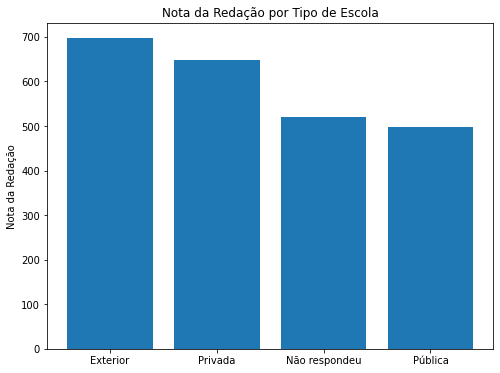

In [15]:
plt.figure(figsize = (8, 6))
plt.ylabel('Nota da Redação')
plt.title('Nota da Redação por Tipo de Escola')
plt.bar('TP_ESCOLA', 'NU_NOTA_REDACAO', data=tipo_escola)

<function matplotlib.pyplot.show(*args, **kw)>

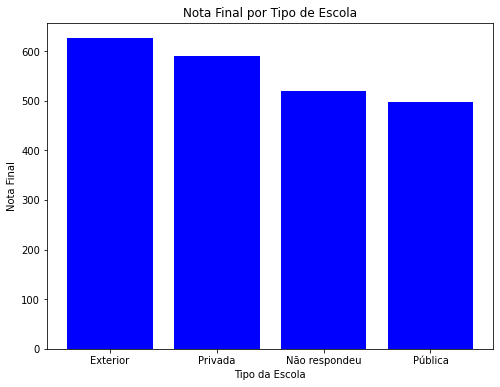

In [16]:
var_x = tipo_escola['TP_ESCOLA']
var_y = tipo_escola['NOTA_FINAL']
plt.figure(figsize = (8, 6))
plt.bar(var_x, var_y,color='blue', width=0.8)
plt.xlabel('Tipo da Escola')
plt.ylabel('Nota Final')
plt.title('Nota Final por Tipo de Escola')
plt.show

In [17]:
faixa_de_renda = pd.value_counts(enem_2017['Q006'])
faixa_de_renda = faixa_de_renda.to_frame()
faixa_de_renda=faixa_de_renda.sort_index()
faixa_de_renda.reset_index(drop=False)
faixa_de_renda.rename(columns = {'Q006':'Contagem_por_Faixa'}, inplace = True)
faixa_de_renda

,Contagem_por_Faixa
A,289513
B,1910020
C,1652208
D,752470
E,540613
F,335386
G,365714
H,243205
I,170866
J,104097


# Distribuição de estudantes por faixa de renda na prova.

<function matplotlib.pyplot.show(*args, **kw)>

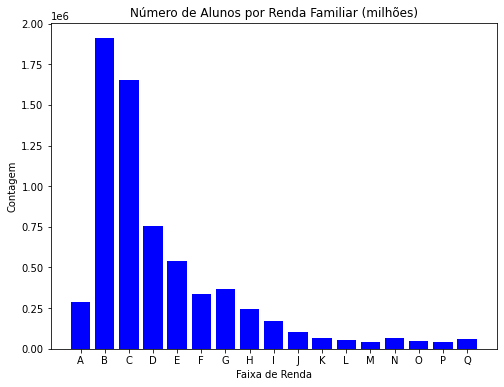

In [18]:
var_x = faixa_de_renda.index
var_y = faixa_de_renda['Contagem_por_Faixa']
plt.figure(figsize = (8, 6))
plt.bar(var_x, var_y,color='blue', width=0.8)
plt.xlabel('Faixa de Renda')
plt.ylabel('Contagem')
plt.title('Número de Alunos por Renda Familiar (milhões)')
plt.show

In [19]:
renda_e_nota_final = enem_2017[['Q006', 'NOTA_FINAL']]
renda_e_nota_final = renda_e_nota_final.groupby('Q006').mean().reset_index()
renda_e_nota_final

,Q006,NOTA_FINAL
0,A,474.75
1,B,482.75
2,C,503.25
3,D,516.50
4,E,527.50
5,F,539.00
6,G,549.50
7,H,562.00
8,I,575.50
9,J,585.50


# Relação entre RENDA FAMILIAR e média da NOTA FINAL


<function matplotlib.pyplot.show(*args, **kw)>

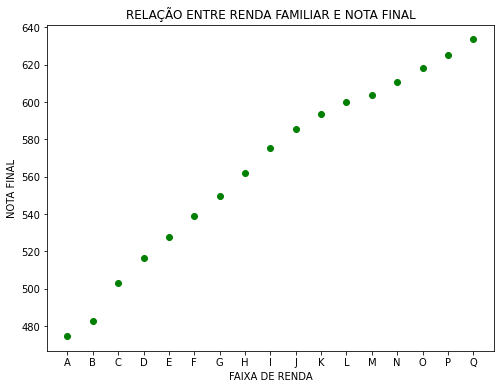

In [20]:
var_x = renda_e_nota_final['Q006']
var_y = renda_e_nota_final['NOTA_FINAL']
plt.figure(figsize = (8, 6))
plt.scatter(var_x,var_y, color='green')
plt.xlabel('FAIXA DE RENDA')
plt.ylabel('NOTA FINAL')
plt.title('RELAÇÃO ENTRE RENDA FAMILIAR E NOTA FINAL')
plt.show

### Este gráfico mostra a estreita relação entre o poder aquisitivo da família e a performance dos estudantes na avaliação. 

# Observando o comportamento da NOTA FINAL por ESTADOS

In [21]:
media_por_estado = enem_2017.groupby('SG_UF_PROVA').mean()
media_por_estado = media_por_estado.drop(['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT'], axis=1)
media_por_estado = media_por_estado.sort_values(by='NOTA_FINAL', ascending=False).reset_index()
media_por_estado

,SG_UF_PROVA,NU_NOTA_REDACAO,NOTA_FINAL
0,SC,537.00,537.50
1,RJ,548.50,536.50
2,MG,545.50,535.50
3,SP,534.00,534.50
4,RS,536.50,533.00
5,DF,541.50,532.50
6,PR,526.00,531.00
7,ES,534.00,529.50
8,GO,531.00,521.00
9,MS,508.25,513.50


<function matplotlib.pyplot.show(*args, **kw)>

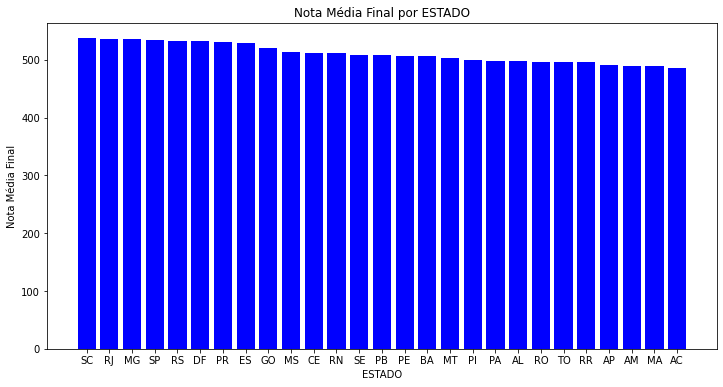

In [22]:
var_x = media_por_estado['SG_UF_PROVA']
var_y = media_por_estado['NOTA_FINAL']
plt.figure(figsize = (12, 6))
plt.bar(var_x, var_y,color='blue', width=0.8)
plt.xlabel('ESTADO')
plt.ylabel('Nota Média Final')
plt.title('Nota Média Final por ESTADO')
plt.show

### Neste gráfico vemos que os cinco primeiros Estados são das regiões Sul e Sudeste.

# O estado brasileiro com a maior média no ENEM 2017 foi:

In [23]:
melhor_media_estado = media_por_estado['NOTA_FINAL'].max()
media_por_estado.loc[media_por_estado['NOTA_FINAL'] == melhor_media_estado]

,SG_UF_PROVA,NU_NOTA_REDACAO,NOTA_FINAL
0,SC,537.0,537.5


# Fonte externa: Este arquivo contem dados sobre o IDHM e IDHM(Renda), ambos para 2017, por Estado e Região Geográfica.

In [24]:
idh_estados = pd.read_excel('/content/drive/MyDrive/COLAB_DADOS/IDH_ESTADOS.xlsx')
idh_estados

,SG_UF_PROVA,REGIÃO,IDHM(2017),IDHM Renda(2017)
0,DF,CENTRO-OESTE,0.850,0.890
1,SP,SUDESTE,0.826,0.854
2,SC,SUL,0.808,0.866
3,RJ,SUDESTE,0.796,0.858
4,PR,SUL,0.792,0.843
5,MG,SUDESTE,0.787,0.875
6,RS,SUL,0.787,0.849
7,MT,CENTRO-OESTE,0.774,0.825
8,ES,SUDESTE,0.772,0.850
9,GO,CENTRO-OESTE,0.769,0.822


In [25]:
idh_por_regiao_e_nota = pd.merge(idh_estados,media_por_estado, on='SG_UF_PROVA', how = 'outer') 
idh_por_regiao_e_nota

,SG_UF_PROVA,REGIÃO,IDHM(2017),IDHM Renda(2017),NU_NOTA_REDACAO,NOTA_FINAL
0,DF,CENTRO-OESTE,0.850,0.890,541.50,532.50
1,SP,SUDESTE,0.826,0.854,534.00,534.50
2,SC,SUL,0.808,0.866,537.00,537.50
3,RJ,SUDESTE,0.796,0.858,548.50,536.50
4,PR,SUL,0.792,0.843,526.00,531.00
5,MG,SUDESTE,0.787,0.875,545.50,535.50
6,RS,SUL,0.787,0.849,536.50,533.00
7,MT,CENTRO-OESTE,0.774,0.825,488.25,502.75
8,ES,SUDESTE,0.772,0.850,534.00,529.50
9,GO,CENTRO-OESTE,0.769,0.822,531.00,521.00


### Correlação entre os Índices e Notas: 

In [68]:
idh_por_regiao_e_nota.corr(method ='pearson')

,IDHM(2017),IDHM Renda(2017),NU_NOTA_REDACAO,NOTA_FINAL
IDHM(2017),1.000000,0.847901,0.591201,0.805267
IDHM Renda(2017),0.847901,1.000000,0.738224,0.833417
NU_NOTA_REDACAO,0.591201,0.738224,1.000000,0.922453
NOTA_FINAL,0.805267,0.833417,0.922453,1.000000


In [26]:
enem_2017 = pd.merge(idh_estados, enem_2017, on='SG_UF_PROVA', how = 'outer')
enem_2017

,SG_UF_PROVA,REGIÃO,IDHM(2017),IDHM Renda(2017),TP_ESCOLA,NO_MUNICIPIO_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q006,Q025,NOTA_FINAL
0,DF,CENTRO-OESTE,0.850,0.890,1,Brasília,1,1,1,1,462.5,535.0,562.0,415.50,740.0,B,B,D,B,543.0
1,DF,CENTRO-OESTE,0.850,0.890,1,Brasília,0,0,0,0,NaN,NaN,NaN,NaN,NaN,E,B,C,A,NaN
2,DF,CENTRO-OESTE,0.850,0.890,1,Brasília,1,1,1,1,515.5,516.5,466.0,509.25,680.0,B,B,C,B,537.5
3,DF,CENTRO-OESTE,0.850,0.890,1,Brasília,1,1,1,1,618.5,662.5,637.5,613.00,560.0,C,C,L,B,618.5
4,DF,CENTRO-OESTE,0.850,0.890,1,Brasília,0,0,0,0,NaN,NaN,NaN,NaN,NaN,E,B,D,B,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6731273,AL,NORDESTE,0.683,0.783,1,Maceió,0,0,0,0,NaN,NaN,NaN,NaN,NaN,B,A,B,A,NaN
6731274,AL,NORDESTE,0.683,0.783,1,Penedo,0,0,0,0,NaN,NaN,NaN,NaN,NaN,D,E,D,B,NaN
6731275,AL,NORDESTE,0.683,0.783,1,Maceió,1,1,1,1,579.0,602.5,570.5,539.50,760.0,E,E,F,A,610.5
6731276,AL,NORDESTE,0.683,0.783,2,Santana do Ipanema,0,0,0,0,NaN,NaN,NaN,NaN,NaN,D,B,A,A,NaN


# Estas informações são então combinadas com os dados do ENEM:

In [27]:
estados_e_regioes = pd.merge(media_por_estado, idh_estados, on='SG_UF_PROVA', how = 'outer')
estados_e_regioes

,SG_UF_PROVA,NU_NOTA_REDACAO,NOTA_FINAL,REGIÃO,IDHM(2017),IDHM Renda(2017)
0,SC,537.00,537.50,SUL,0.808,0.866
1,RJ,548.50,536.50,SUDESTE,0.796,0.858
2,MG,545.50,535.50,SUDESTE,0.787,0.875
3,SP,534.00,534.50,SUDESTE,0.826,0.854
4,RS,536.50,533.00,SUL,0.787,0.849
5,DF,541.50,532.50,CENTRO-OESTE,0.850,0.890
6,PR,526.00,531.00,SUL,0.792,0.843
7,ES,534.00,529.50,SUDESTE,0.772,0.850
8,GO,531.00,521.00,CENTRO-OESTE,0.769,0.822
9,MS,508.25,513.50,CENTRO-OESTE,0.766,0.847


# O estado com a melhor média de notas, nesta edição do ENEM:

In [28]:
melhor_estado = estados_e_regioes['NOTA_FINAL'].max()
estados_e_regioes.loc[estados_e_regioes['NOTA_FINAL'] == melhor_estado]

,SG_UF_PROVA,NU_NOTA_REDACAO,NOTA_FINAL,REGIÃO,IDHM(2017),IDHM Renda(2017)
0,SC,537.0,537.5,SUL,0.808,0.866


# Analisando o desempenho por REGIÃO GEOGRÁFICA e índices de desenvolvimento e renda.

In [29]:
estados_e_regioes = estados_e_regioes.sort_values(by='NOTA_FINAL', ascending=False)
media_por_regiao = estados_e_regioes.groupby('REGIÃO').mean().reset_index()
media_por_regiao = media_por_regiao.drop(['NU_NOTA_REDACAO', 'IDHM Renda(2017)'], axis=1)
media_por_regiao

,REGIÃO,NOTA_FINAL,IDHM(2017)
0,CENTRO-OESTE,517.50,0.789750
1,NORDESTE,504.25,0.710889
2,NORTE,493.25,0.730000
3,SUDESTE,534.00,0.795250
4,SUL,534.00,0.795667


### As duas regiões com maior IDHM, tem também as melhores MÉDIAS FINAIS nas notas.

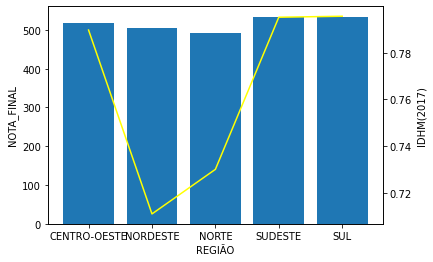

In [30]:
fig,ax = plt.subplots()

ax.bar('REGIÃO', 'NOTA_FINAL', data = media_por_regiao)
ax.set_xlabel('REGIÃO')
ax.set_ylabel('NOTA_FINAL')

ax2 = ax.twinx()
ax2.plot('REGIÃO', 'IDHM(2017)', data = media_por_regiao, color='yellow')
ax2.set_ylabel('IDHM(2017)')

plt.title = ('Nota Média Final por IDHM por REGIÃO')


## Em ordem decrescente, observamos que, em média, a região Sul apresentou a melhor NOTA_FINAL, e a região Norte, a pior.

In [31]:
media_por_regiao.sort_values(by='NOTA_FINAL', ascending=False).reset_index()

,index,REGIÃO,NOTA_FINAL,IDHM(2017)
0,3,SUDESTE,534.00,0.795250
1,4,SUL,534.00,0.795667
2,0,CENTRO-OESTE,517.50,0.789750
3,1,NORDESTE,504.25,0.710889
4,2,NORTE,493.25,0.730000


In [32]:
media_por_estado = media_por_estado.dropna()
# O Estado da Escola foi escolhido, para comparar por escolas.

In [33]:
media_por_estado.sort_values(by='NOTA_FINAL', ascending=False).reset_index()

,index,SG_UF_PROVA,NU_NOTA_REDACAO,NOTA_FINAL
0,0,SC,537.00,537.50
1,1,RJ,548.50,536.50
2,2,MG,545.50,535.50
3,3,SP,534.00,534.50
4,4,RS,536.50,533.00
5,5,DF,541.50,532.50
6,6,PR,526.00,531.00
7,7,ES,534.00,529.50
8,8,GO,531.00,521.00
9,9,MS,508.25,513.50


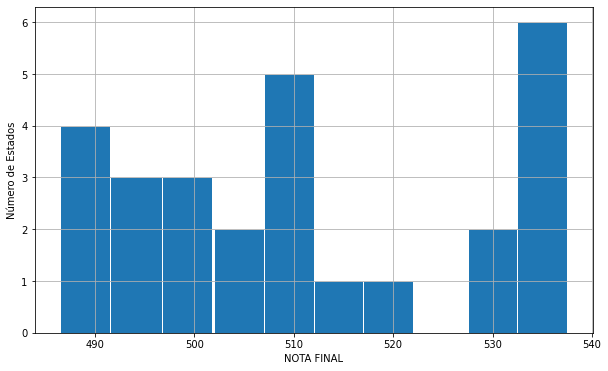

In [37]:
plt.figure(figsize = (10, 6))
plt.xlabel('NOTA FINAL')
plt.ylabel('Número de Estados')
#plt.title('Distribuição da Nota Final Média dos Estados')
media_por_estado['NOTA_FINAL'].hist(edgecolor="white", bins=10)

### Esta é uma distribuição muito irregular, mostra a extrema desigualdade educacional entre os Estados.

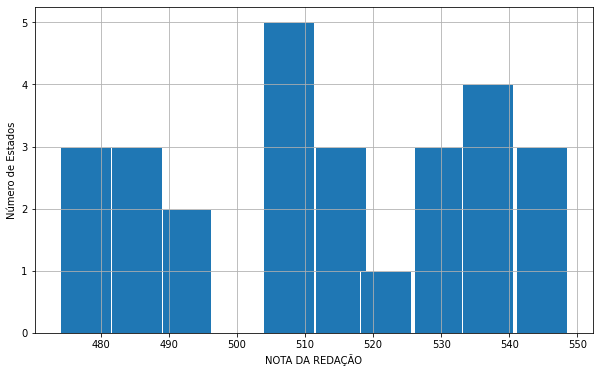

In [39]:
plt.figure(figsize = (10, 6))
plt.xlabel('NOTA DA REDAÇÃO')
plt.ylabel('Número de Estados')
#plt.title('Distribuição da Nota Média da Redação dos Estados')
media_por_estado['NU_NOTA_REDACAO'].hist(edgecolor="white", bins=10)

In [42]:
media_por_cidade = enem_2017.groupby(['NO_MUNICIPIO_PROVA']).mean()
media_por_cidade = media_por_cidade.dropna()
media_por_cidade.info()
media_por_cidade.sample(10).reset_index()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 1690 entries, Abaetetuba to Jutaí
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IDHM(2017)        1690 non-null   float64
 1   IDHM Renda(2017)  1690 non-null   float64
 2   NU_NOTA_CN        1690 non-null   float16
 3   NU_NOTA_CH        1690 non-null   float16
 4   NU_NOTA_LC        1690 non-null   float16
 5   NU_NOTA_MT        1690 non-null   float16
 6   NU_NOTA_REDACAO   1690 non-null   float16
 7   NOTA_FINAL        1690 non-null   float16
dtypes: float16(6), float64(2)
memory usage: 127.3 KB


,NO_MUNICIPIO_PROVA,IDHM(2017),IDHM Renda(2017),NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NOTA_FINAL
0,Uberaba,0.787,0.875,533.50,540.50,527.5,550.00,560.0,545.00
1,Novo Aripuanã,0.733,0.786,462.00,460.75,452.5,454.75,442.5,456.75
2,Caraguatatuba,0.826,0.854,511.00,528.50,525.0,532.00,501.0,522.00
3,Codó,0.687,0.764,480.50,476.25,473.0,469.50,451.5,471.75
4,Leopoldina,0.787,0.875,533.00,536.00,523.0,558.00,549.0,542.50
5,Banabuiú,0.735,0.818,483.50,482.00,482.5,483.75,463.0,481.25
6,Itapiranga,0.808,0.866,527.00,532.50,511.5,549.00,543.5,533.50
7,Três Passos,0.787,0.849,517.00,523.50,508.0,524.50,523.5,521.00
8,Pouso Alegre,0.787,0.875,536.50,548.50,533.5,562.00,573.0,553.00
9,Guarulhos,0.826,0.854,509.75,526.50,521.5,525.50,522.5,523.50


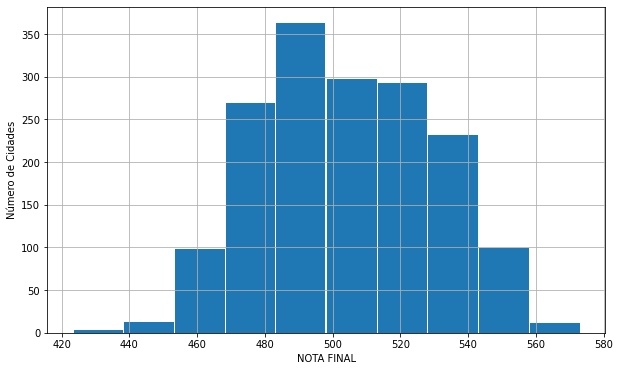

In [44]:
plt.figure(figsize = (10, 6))
plt.xlabel('NOTA FINAL')
plt.ylabel('Número de Cidades')
#plt.title('Distribuição da Nota Média Final por Cidades')
media_por_cidade['NOTA_FINAL'].hist(edgecolor="white", bins=10)

In [45]:
dez_melhores_cidades = media_por_cidade.nlargest(10, 'NOTA_FINAL')
dez_melhores_cidades = media_por_cidade.sort_values(by='NOTA_FINAL', ascending=False).head(10)
dez_melhores_cidades = dez_melhores_cidades.drop(['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT'], axis=1)
dez_melhores_cidades.reset_index()

,NO_MUNICIPIO_PROVA,IDHM(2017),IDHM Renda(2017),NU_NOTA_REDACAO,NOTA_FINAL
0,Valinhos,0.826,0.854,583.5,573.0
1,Florianópolis,0.808,0.866,568.0,568.0
2,Niterói,0.796,0.858,598.0,567.5
3,Arroio do Meio,0.787,0.849,598.0,564.5
4,Nova Petrópolis,0.787,0.849,585.5,563.0
5,Vinhedo,0.826,0.854,563.5,561.5
6,Lajeado,0.787,0.849,583.5,561.0
7,São José dos Campos,0.826,0.854,572.5,560.5
8,Veranópolis,0.787,0.849,614.0,559.5
9,Vitória,0.772,0.850,571.5,558.0


In [46]:
dez_piores_cidades = media_por_cidade.sort_values(by='NOTA_FINAL', ascending=True).head(10)
dez_piores_cidades = dez_piores_cidades.drop(['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT'], axis=1)
dez_piores_cidades.reset_index()

,NO_MUNICIPIO_PROVA,IDHM(2017),IDHM Renda(2017),NU_NOTA_REDACAO,NOTA_FINAL
0,Benjamin Constant,0.733,0.786,330.50,423.25
1,Santo Antônio do Içá,0.733,0.786,333.00,423.75
2,São Paulo de Olivença,0.733,0.786,315.75,423.75
3,Japurá,0.733,0.786,360.75,435.00
4,Tonantins,0.733,0.786,388.25,440.75
5,Uarini,0.733,0.786,384.75,441.75
6,São Félix do Araguaia,0.774,0.825,369.25,444.75
7,Anamã,0.733,0.786,371.50,444.75
8,Itacajá,0.743,0.811,378.50,445.00
9,Maraã,0.733,0.786,367.75,446.00


# Analisando a influência do grau de instrução dos Pais e Mães sobre a NOTA FINAL do Estudante
### Grau de Instrução
#### A Nunca estudou.
#### B Não completou a 4ª série/5º ano do Ensino Fundamental.
#### C Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.
#### D Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.
#### E Completou o Ensino Médio, mas não completou a Faculdade.
#### F Completou a Faculdade, mas não completou a Pós-graduação.
#### G Completou a Pós-graduação.
#### H Não sei.


### Grau de Instrução do Pai

In [70]:
instrucao_pai = enem_2017.groupby(['Q001']).mean().reset_index()
instrucao_pai = instrucao_pai.drop(['IDHM(2017)', 'IDHM Renda(2017)', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT'], axis=1)
instrucao_pai


,Q001,NU_NOTA_REDACAO,NOTA_FINAL
0,A,440.25,473.00
1,B,481.00,492.25
2,C,508.00,507.25
3,D,523.00,515.50
4,E,551.50,534.50
5,F,614.00,579.50
6,G,639.00,597.00
7,H,483.50,496.25


<function matplotlib.pyplot.show(*args, **kw)>

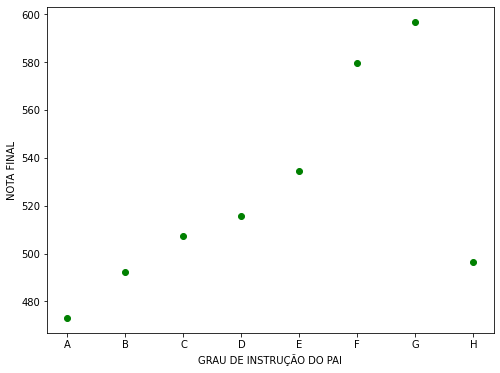

In [72]:
var_x = instrucao_pai['Q001']
var_y = instrucao_pai['NOTA_FINAL']
plt.figure(figsize = (8, 6))
plt.scatter(var_x,var_y, color='green')
plt.xlabel('GRAU DE INSTRUÇÃO DO PAI')
plt.ylabel('NOTA FINAL')
#plt.title('RELAÇÃO ENTRE GRAU DE INSTRUÇÃO E NOTA FINAL')
plt.show

### Grau de Instrução da Mãe

In [59]:
instrucao_mae = enem_2017.groupby(['Q002']).mean().reset_index()
instrucao_mae = instrucao_mae.drop(['IDHM(2017)', 'IDHM Renda(2017)', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT'], axis=1)
instrucao_mae

,Q002,NU_NOTA_REDACAO,NOTA_FINAL
0,A,425.75,468.50
1,B,471.00,488.00
2,C,496.50,501.25
3,D,510.50,508.25
4,E,540.50,527.00
5,F,598.50,567.50
6,G,617.00,578.50
7,H,457.00,484.00


<function matplotlib.pyplot.show(*args, **kw)>

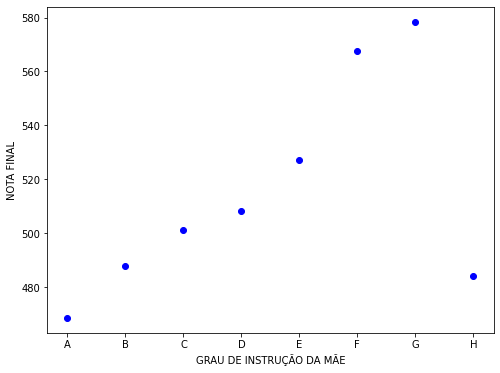

In [74]:
var_x = instrucao_mae['Q002']
var_y = instrucao_mae['NOTA_FINAL']
plt.figure(figsize = (8, 6))
plt.scatter(var_x,var_y, color='blue')
plt.xlabel('GRAU DE INSTRUÇÃO DA MÃE')
plt.ylabel('NOTA FINAL')
#plt.title('RELAÇÃO ENTRE GRAU DE INSTRUÇÃO E NOTA FINAL')
plt.show

#### Podemos ver que as relações entre NOTAS FINAIS e grau de instrução de PAIS e MÃES são muito parecidas em tendência de crescimento com o aumento da instrução dos pais. O ponto H se refere ao grau de instrução desconhecido.

In [75]:
enem_2017.

,SG_UF_PROVA,REGIÃO,IDHM(2017),IDHM Renda(2017),TP_ESCOLA,NO_MUNICIPIO_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q006,Q025,NOTA_FINAL
0,DF,CENTRO-OESTE,0.850,0.890,1,Brasília,1,1,1,1,462.5,535.0,562.0,415.50,740.0,B,B,D,B,543.0
1,DF,CENTRO-OESTE,0.850,0.890,1,Brasília,0,0,0,0,NaN,NaN,NaN,NaN,NaN,E,B,C,A,NaN
2,DF,CENTRO-OESTE,0.850,0.890,1,Brasília,1,1,1,1,515.5,516.5,466.0,509.25,680.0,B,B,C,B,537.5
3,DF,CENTRO-OESTE,0.850,0.890,1,Brasília,1,1,1,1,618.5,662.5,637.5,613.00,560.0,C,C,L,B,618.5
4,DF,CENTRO-OESTE,0.850,0.890,1,Brasília,0,0,0,0,NaN,NaN,NaN,NaN,NaN,E,B,D,B,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6731273,AL,NORDESTE,0.683,0.783,1,Maceió,0,0,0,0,NaN,NaN,NaN,NaN,NaN,B,A,B,A,NaN
6731274,AL,NORDESTE,0.683,0.783,1,Penedo,0,0,0,0,NaN,NaN,NaN,NaN,NaN,D,E,D,B,NaN
6731275,AL,NORDESTE,0.683,0.783,1,Maceió,1,1,1,1,579.0,602.5,570.5,539.50,760.0,E,E,F,A,610.5
6731276,AL,NORDESTE,0.683,0.783,2,Santana do Ipanema,0,0,0,0,NaN,NaN,NaN,NaN,NaN,D,B,A,A,NaN


In [91]:
internet_e_nota_final = enem_2017.groupby('Q025').mean().reset_index()
internet_e_nota_final

,Q025,IDHM(2017),IDHM Renda(2017),NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NOTA_FINAL
0,A,0.744608,0.819522,485.75,488.5,483.5,479.0,467.25,483.0
1,B,0.770876,0.837613,521.50,531.5,521.5,535.0,546.00,533.5


In [92]:

internet_e_nota_final.rename(columns = {'Q025':'CASA_COM_INTERNET'}, inplace = True)
internet_e_nota_final['CASA_COM_INTERNET'] = internet_e_nota_final['CASA_COM_INTERNET'].map({
    'A':'NÃO',
    'B':'SIM'},)
internet_e_nota_final = internet_e_nota_final.drop(['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT'], axis=1)
internet_e_nota_final

,CASA_COM_INTERNET,IDHM(2017),IDHM Renda(2017),NU_NOTA_REDACAO,NOTA_FINAL
0,NÃO,0.744608,0.819522,467.25,483.0
1,SIM,0.770876,0.837613,546.00,533.5


#### Ter INTERNET aumenta a NOTA FINAL em 50.5 pontos.
#### Ter INTERNET aumenta a nota da REDAÇÃO em 78.75 pontos. 
#### Podemos observar que a diferença na nota da REDAÇÃO é maior que a diferença na NOTA FINAL, ter INTERNET em casa é muito importante.

## FONTE EXTERNA: HEATMAP Para correlação: População, IDHM Renda(2017), NOTA DA REDACAO e NOTA FINAL.
### O Arquivo 'cidades mais populosas do Brasil.xlsx' contém as 219 cidades mais populosas do Brasil.

In [126]:
cidades_pop = pd.read_excel('/content/drive/MyDrive/COLAB_DADOS/cidades mais populosas do Brasil.xlsx')
cidades_pop

,Município,População
0,São Paulo,12252023
1,Rio de Janeiro,6718903
2,Brasília,3015268
3,Salvador,2872347
4,Fortaleza,2669342
...,...,...
214,Santa Rita,136586
215,Sabará,136344
216,Varginha,135558
217,Apucarana,134996


In [127]:
cidades_pop.rename(columns = {'Município':'NO_MUNICIPIO_PROVA'}, inplace = True)
cidades_pop=pd.merge(cidades_pop, enem_2017, on='NO_MUNICIPIO_PROVA', how='inner')
cidades_pop

,NO_MUNICIPIO_PROVA,População,SG_UF_PROVA,REGIÃO,IDHM(2017),IDHM Renda(2017),TP_ESCOLA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,...,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q006,Q025,NOTA_FINAL
0,São Paulo,12252023,SP,SUDESTE,0.826,0.854,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,A,A,G,B,NaN
1,São Paulo,12252023,SP,SUDESTE,0.826,0.854,1,1,1,1,...,631.0,609.50,596.0,535.5,720.0,F,D,J,B,618.50
2,São Paulo,12252023,SP,SUDESTE,0.826,0.854,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,G,F,G,B,NaN
3,São Paulo,12252023,SP,SUDESTE,0.826,0.854,1,1,1,1,...,685.0,719.00,619.5,799.5,800.0,G,G,H,B,725.00
4,São Paulo,12252023,SP,SUDESTE,0.826,0.854,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,B,C,C,B,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4075718,Brusque,134723,SC,SUL,0.808,0.866,1,1,1,1,...,519.5,505.75,531.0,434.0,460.0,D,B,C,B,490.00
4075719,Brusque,134723,SC,SUL,0.808,0.866,1,1,1,1,...,509.5,466.00,447.5,511.5,520.0,B,C,D,B,490.75
4075720,Brusque,134723,SC,SUL,0.808,0.866,1,1,1,1,...,536.0,405.00,432.5,420.0,460.0,C,C,H,B,450.75
4075721,Brusque,134723,SC,SUL,0.808,0.866,2,0,0,0,...,NaN,NaN,NaN,NaN,NaN,B,B,H,B,NaN


In [128]:
cidades_pop = cidades_pop.drop(['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT'], axis=1)
cidades_pop = cidades_pop.drop(['IDHM(2017)', 'TP_ESCOLA', 'TP_PRESENCA_CN','TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT'], axis=1)
cidades_pop = cidades_pop.drop(['Q001', 'Q002', 'Q006','Q025'], axis=1)
cidades_pop

,NO_MUNICIPIO_PROVA,População,SG_UF_PROVA,REGIÃO,IDHM Renda(2017),NU_NOTA_REDACAO,NOTA_FINAL
0,São Paulo,12252023,SP,SUDESTE,0.854,NaN,NaN
1,São Paulo,12252023,SP,SUDESTE,0.854,720.0,618.50
2,São Paulo,12252023,SP,SUDESTE,0.854,NaN,NaN
3,São Paulo,12252023,SP,SUDESTE,0.854,800.0,725.00
4,São Paulo,12252023,SP,SUDESTE,0.854,NaN,NaN
...,...,...,...,...,...,...,...
4075718,Brusque,134723,SC,SUL,0.866,460.0,490.00
4075719,Brusque,134723,SC,SUL,0.866,520.0,490.75
4075720,Brusque,134723,SC,SUL,0.866,460.0,450.75
4075721,Brusque,134723,SC,SUL,0.866,NaN,NaN


In [129]:
cidades_pop = cidades_pop.dropna()
cidades_pop

,NO_MUNICIPIO_PROVA,População,SG_UF_PROVA,REGIÃO,IDHM Renda(2017),NU_NOTA_REDACAO,NOTA_FINAL
1,São Paulo,12252023,SP,SUDESTE,0.854,720.0,618.50
3,São Paulo,12252023,SP,SUDESTE,0.854,800.0,725.00
5,São Paulo,12252023,SP,SUDESTE,0.854,520.0,478.50
6,São Paulo,12252023,SP,SUDESTE,0.854,520.0,476.00
7,São Paulo,12252023,SP,SUDESTE,0.854,560.0,513.00
...,...,...,...,...,...,...,...
4075716,Brusque,134723,SC,SUL,0.866,660.0,559.00
4075717,Brusque,134723,SC,SUL,0.866,760.0,656.50
4075718,Brusque,134723,SC,SUL,0.866,460.0,490.00
4075719,Brusque,134723,SC,SUL,0.866,520.0,490.75


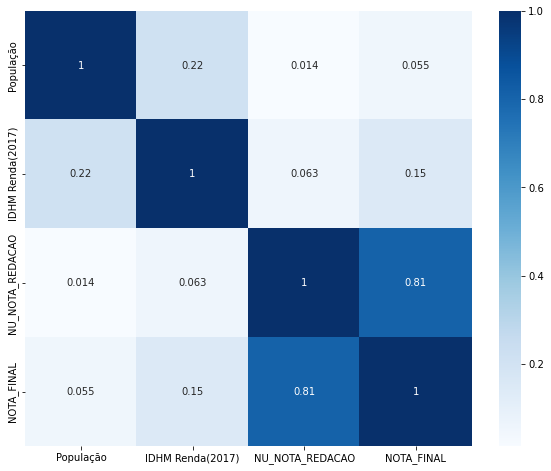

In [131]:
plt.figure(figsize = (10, 8))
corr = cidades_pop.corr(method ='pearson')
sb.heatmap(corr, cmap="Blues", annot=True)